**Group: g16**

- anderdav@students.zhaw.ch
- goodnic1@students.zhaw.ch
- janick.rueegger@students.fhnw.ch
- neyerjoh@students.zhaw.ch

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + f'OK: TensorFlow >= 2.0.0, (installed version is {tf_version})' + '.\033[0m')

2022-04-19 21:06:06.257437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-19 21:06:06.257455: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


OK: TensorFlow >= 2.0.0, (installed version is 2.8.0).


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)


# Prepare Data

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define Model

In [7]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

2022-04-19 21:06:27.562772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 21:06:27.563168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 21:06:27.563624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-19 21:06:27.563729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-19 21:06:27.563826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not lo

## Train Model

In [8]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = cnn.fit(X_train, Y_train, batch_size=256, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
196/196 [==============================] - 36s 182ms/step - loss: 1.6992 - accuracy: 0.3925 - val_loss: 1.4449 - val_accuracy: 0.4881
Epoch 2/20
196/196 [==============================] - 37s 190ms/step - loss: 1.3403 - accuracy: 0.5270 - val_loss: 1.2480 - val_accuracy: 0.5567
Epoch 3/20
196/196 [==============================] - 39s 197ms/step - loss: 1.1893 - accuracy: 0.5835 - val_loss: 1.1491 - val_accuracy: 0.5918
Epoch 4/20
196/196 [==============================] - 36s 186ms/step - loss: 1.0879 - accuracy: 0.6223 - val_loss: 1.1215 - val_accuracy: 0.6073
Epoch 5/20
196/196 [==============================] - 36s 183ms/step - loss: 1.0164 - accuracy: 0.6466 - val_loss: 1.0450 - val_accuracy: 0.6381
Epoch 6/20
196/196 [==============================] - 36s 184ms/step - loss: 0.9548 - accuracy: 0.6700 - val_loss: 0.9900 - val_accuracy: 0.6577
Epoch 7/20
196/196 [==============================] - 37s 187ms/step - loss: 0.9158 - accuracy: 0.6850 - val_loss: 0.9452 - val_ac

## Feature Map
from: https://www.analyticsvidhya.com/blog/2020/11/tutorial-how-to-visualize-feature-maps-directly-from-cnn-layers/

In [9]:
layer_names = [layer.name for layer in cnn.layers]
layer_outputs = [layer.output for layer in cnn.layers]
cnn.input

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_input')>

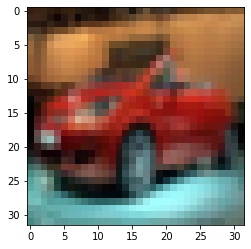

In [10]:
input_image = X_train[45]

# shows the whole model if 'plot_layer' is 'None' (to fulfill ex. c)
# shows only that particular layer if it is an 'int' (to fulfill ex. b)
plot_layer = None

plt.imshow(input_image)
input_image = input_image.reshape(1, 32, 32, 3)

In [11]:
# create feature map and predict
feature_map_model = tf.keras.models.Model(inputs=cnn.input, outputs=layer_outputs)
feature_maps = feature_map_model.predict(input_image)
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d is =======>> (1, 32, 32, 32)
The shape of the conv2d_1 is =======>> (1, 32, 32, 32)
The shape of the max_pooling2d is =======>> (1, 16, 16, 32)
The shape of the conv2d_2 is =======>> (1, 16, 16, 32)
The shape of the max_pooling2d_1 is =======>> (1, 8, 8, 32)
The shape of the flatten is =======>> (1, 2048)
The shape of the dense is =======>> (1, 10)


/tmp/ipykernel_8651/2292868554.py:18: RuntimeWarning: invalid value encountered in true_divide
  feature_image/= feature_image.std ()


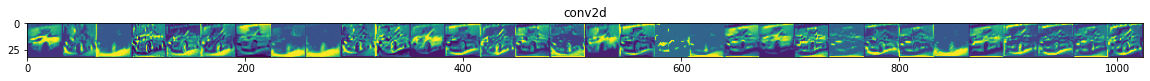

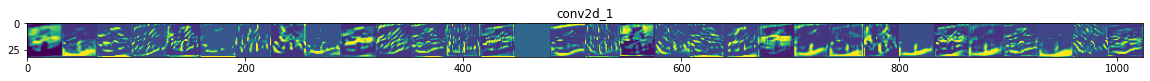

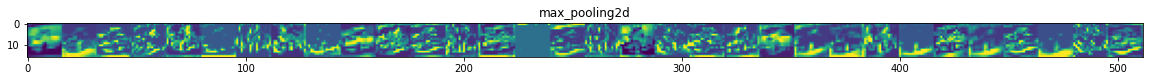

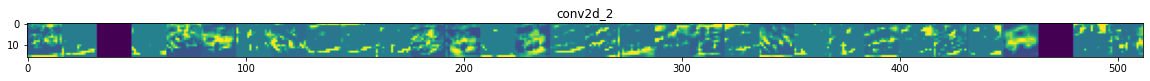

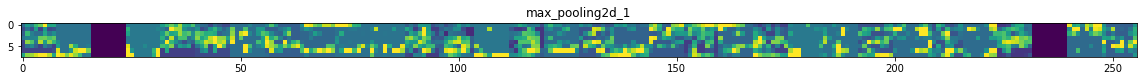

In [12]:
n = -1
for layer_name, feature_map in zip(layer_names, feature_maps):  
    n += 1
    if plot_layer is not None:
        if n != plot_layer:
            continue
    
    if len(feature_map.shape) != 4:
        continue

    k = feature_map.shape[-1]  
    size=feature_map.shape[1]
    image_belt = np.zeros((size, k*size))
    for i in range(k):
        feature_image = feature_map[0, :, :, i]
                
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
        feature_image*=  64
        feature_image+= 128
        feature_image= np.clip(feature_image, 0, 255).astype('uint8')

        image_belt[:, i * size : (i + 1) * size] = feature_image
            
    scale = 20. / k
    plt.figure( figsize=(scale * k, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( image_belt, aspect='auto')

* At the top layers, the pictures are more sharp and have more detail. It is even possible see some car-like shapes -> low level features
* Towards the bottom layers, the pictures have not many pixels left. It is generelly harder to make out any sense -> high level features